# 1. Exploratory Data Analysis (EDA)

This notebook performs the initial exploratory data analysis on the electricity market data. We will:
1. Load a sample of the preprocessed data.
2. Visualize the lifecycle of a few sample contracts.
3. Analyze basic statistics and check for missing values.
4. Visualize trading activity (liquidity) across assets.
5. Plot correlation heatmaps.

## 1.1 Setup and Data Loading

In [6]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

# Define base directory
BASE_DIR = '..'
DATA_DIR = os.path.join(BASE_DIR, 'data', 'train') # Use the preprocessed training data

# Load a few sample files to start
sample_files = glob.glob(os.path.join(DATA_DIR, '*.parquet'))[:15]
dfs = {os.path.basename(f): pd.read_parquet(f) for f in sample_files}

print(f"Loaded {len(dfs)} sample assets.")
asset_example_name, df_example = list(dfs.items())[0]
print(f'Example asset: {asset_example_name}')
sample_df = df_example[df_example["volume"]>0]
display(sample_df.head(10))

Loaded 15 sample assets.
Example asset: Fri00Q1.parquet


,ExecutionTime,high,low,close,volume,hour_of_day,day_of_week,week_of_year,month,is_weekend,...,close_delta_adj_4,volume_adj_4,close_lag_adj_5,close_delta_adj_5,volume_adj_5,close_lag_adj_6,close_delta_adj_6,volume_adj_6,nearest_liquid_contract_close,cross_contract_mean
90,2021-01-07 19:15:00+00:00,57.28,55.20,57.28,1.125,19,3,1,1,0,...,7.16,2.350,0.00,0.00,0.000,0.00,0.00,0.000,50.12,46.760000
91,2021-01-07 19:30:00+00:00,61.92,59.70,61.30,5.150,19,3,1,1,0,...,9.47,0.625,0.00,0.00,0.000,0.00,0.00,0.000,46.50,47.382500
93,2021-01-07 20:00:00+00:00,59.95,56.09,56.09,0.200,20,3,1,1,0,...,3.47,0.100,0.00,0.00,0.000,0.00,0.00,0.000,45.69,47.542500
94,2021-01-07 20:15:00+00:00,63.75,60.99,63.47,2.525,20,3,1,1,0,...,9.35,0.100,0.00,0.00,0.000,0.00,0.00,0.000,45.84,47.475000
95,2021-01-07 20:30:00+00:00,63.50,62.60,63.24,2.425,20,3,1,1,0,...,9.22,0.050,0.00,0.00,0.000,0.00,0.00,0.000,45.52,48.102500
96,2021-01-07 20:45:00+00:00,64.50,62.14,62.14,9.200,20,3,1,1,0,...,7.65,0.150,50.99,11.15,0.025,0.00,0.00,0.000,47.46,49.368000
97,2021-01-07 21:00:00+00:00,63.50,62.06,63.50,2.975,21,3,1,1,0,...,8.05,8.950,50.98,12.52,2.750,48.77,14.73,1.925,48.80,49.245000
98,2021-01-07 21:15:00+00:00,64.20,62.42,62.42,19.450,21,3,1,1,0,...,7.90,4.075,50.60,11.82,3.700,48.25,14.17,2.875,45.38,47.713333
99,2021-01-07 21:30:00+00:00,63.80,59.70,63.80,15.000,21,3,1,1,0,...,8.39,3.350,50.38,13.42,0.250,48.20,15.60,3.075,44.64,47.741667
100,2021-01-07 21:45:00+00:00,64.80,63.80,64.80,8.225,21,3,1,1,0,...,7.98,4.475,49.62,15.18,1.250,48.80,16.00,1.400,45.60,48.201667


## 1.2 Visualize Contract Lifecycle

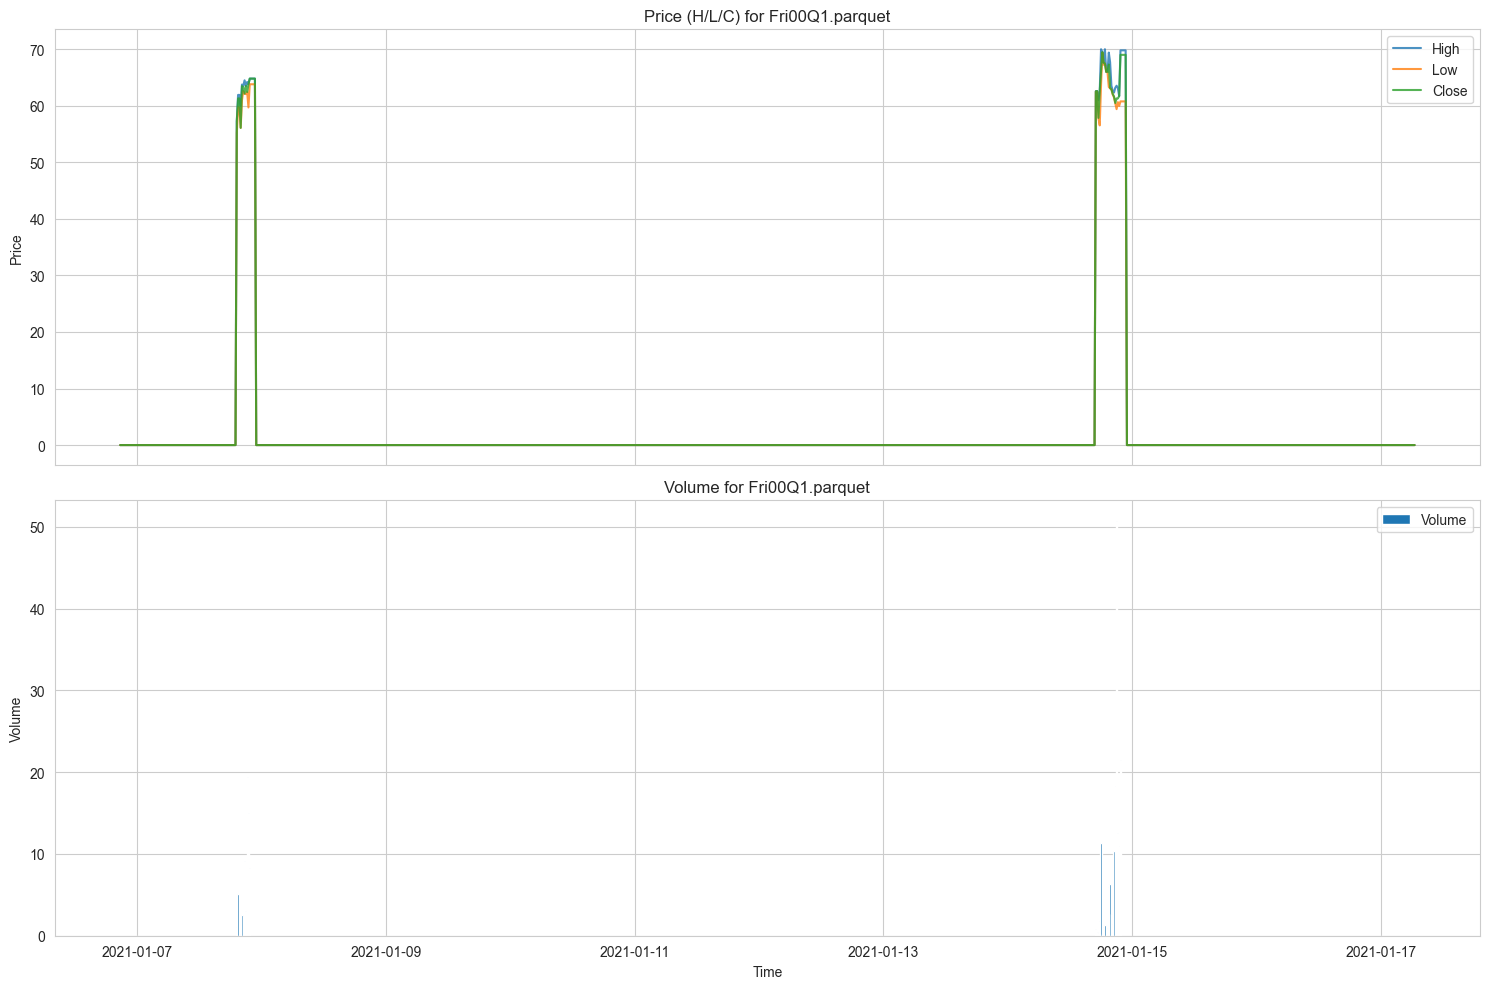

In [7]:
# Let's visualize the H/L/C/V and Volume for our example asset
df_example['ExecutionTime'] = pd.to_datetime(df_example['ExecutionTime'])
df_plot = df_example.set_index('ExecutionTime')
df_plot = df_plot[:1000]

fig, axes = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot H, L, C
axes[0].plot(df_plot.index, df_plot['high'], label='High', alpha=0.8)
axes[0].plot(df_plot.index, df_plot['low'], label='Low', alpha=0.8)
axes[0].plot(df_plot.index, df_plot['close'], label='Close', alpha=0.8)
axes[0].set_title(f'Price (H/L/C) for {asset_example_name}')
axes[0].set_ylabel('Price')
axes[0].legend()
axes[0].grid(True)

# Plot Volume
axes[1].bar(df_plot.index, df_plot['volume'], width=0.01, label='Volume')
axes[1].set_title(f'Volume for {asset_example_name}')
axes[1].set_ylabel('Volume')
axes[1].set_xlabel('Time')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 1.3 Basic Statistics and NaN Check

In [8]:
# Show basic statistics for the example dataframe
print("Basic Statistics:")
display(df_example.describe())

# Check for NaN values
print('NaN Values Check:')
display(df_example.isnull().sum())

Basic Statistics:


,high,low,close,volume,hour_of_day,day_of_week,week_of_year,month,is_weekend,is_trading,...,close_delta_adj_4,volume_adj_4,close_lag_adj_5,close_delta_adj_5,volume_adj_5,close_lag_adj_6,close_delta_adj_6,volume_adj_6,nearest_liquid_contract_close,cross_contract_mean
count,69517.000000,69517.000000,69517.000000,69517.000000,69517.000000,69517.000000,69517.00000,69517.000000,69517.000000,69517.00000,...,69517.000000,69517.000000,69517.000000,69517.000000,69517.000000,69517.000000,69517.000000,69517.000000,69517.000000,69517.000000
mean,9.031864,8.572422,8.788206,0.326784,11.501935,3.003956,26.56566,6.570781,0.285858,0.04760,...,0.844175,0.299100,7.315506,1.467483,0.251898,6.899882,1.882213,0.253532,7.339090,7.323022
std,49.185630,46.991198,47.962428,3.064956,6.923047,1.997452,14.93254,3.425611,0.451825,0.21292,...,7.193601,2.571356,40.719909,9.637205,2.352848,38.848622,12.169882,2.428834,42.065901,40.733435
min,0.000000,-32.410000,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.00000,...,-123.440000,0.000000,-19.500000,-113.930000,0.000000,-62.150000,-176.850000,0.000000,-53.700000,-4.378333
25%,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,14.00000,4.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000,27.00000,7.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,39.00000,10.000000,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,657.200000,629.310000,654.400000,137.875000,23.000000,6.000000,52.00000,12.000000,1.000000,1.00000,...,204.580000,91.400000,621.000000,284.420000,86.150000,620.500000,290.360000,84.325000,679.160000,619.490000


NaN Values Check:


ExecutionTime                    0
high                             0
low                              0
close                            0
volume                           0
hour_of_day                      0
day_of_week                      0
week_of_year                     0
month                            0
is_weekend                       0
is_trading                       0
time_to_delivery                 0
close_lag_adj_1                  0
close_delta_adj_1                0
volume_adj_1                     0
close_lag_adj_2                  0
close_delta_adj_2                0
volume_adj_2                     0
close_lag_adj_3                  0
close_delta_adj_3                0
volume_adj_3                     0
close_lag_adj_4                  0
close_delta_adj_4                0
volume_adj_4                     0
close_lag_adj_5                  0
close_delta_adj_5                0
volume_adj_5                     0
close_lag_adj_6                  0
close_delta_adj_6   

## 1.4 Visualize Trading Activity (Liquidity)

Asset Liquidity (Fraction of time with active trading):


Fri00Q1.parquet    0.047600
Fri00Q2.parquet    0.048492
Fri00Q3.parquet    0.049326
Fri00Q4.parquet    0.050261
Fri01Q1.parquet    0.052735
Fri01Q2.parquet    0.053570
Fri01Q3.parquet    0.055109
Fri01Q4.parquet    0.056173
Fri02Q1.parquet    0.057367
Fri02Q2.parquet    0.058202
Fri02Q3.parquet    0.059683
Fri02Q4.parquet    0.061438
Fri03Q1.parquet    0.062201
Fri03Q2.parquet    0.063783
Fri03Q3.parquet    0.065034
dtype: float64

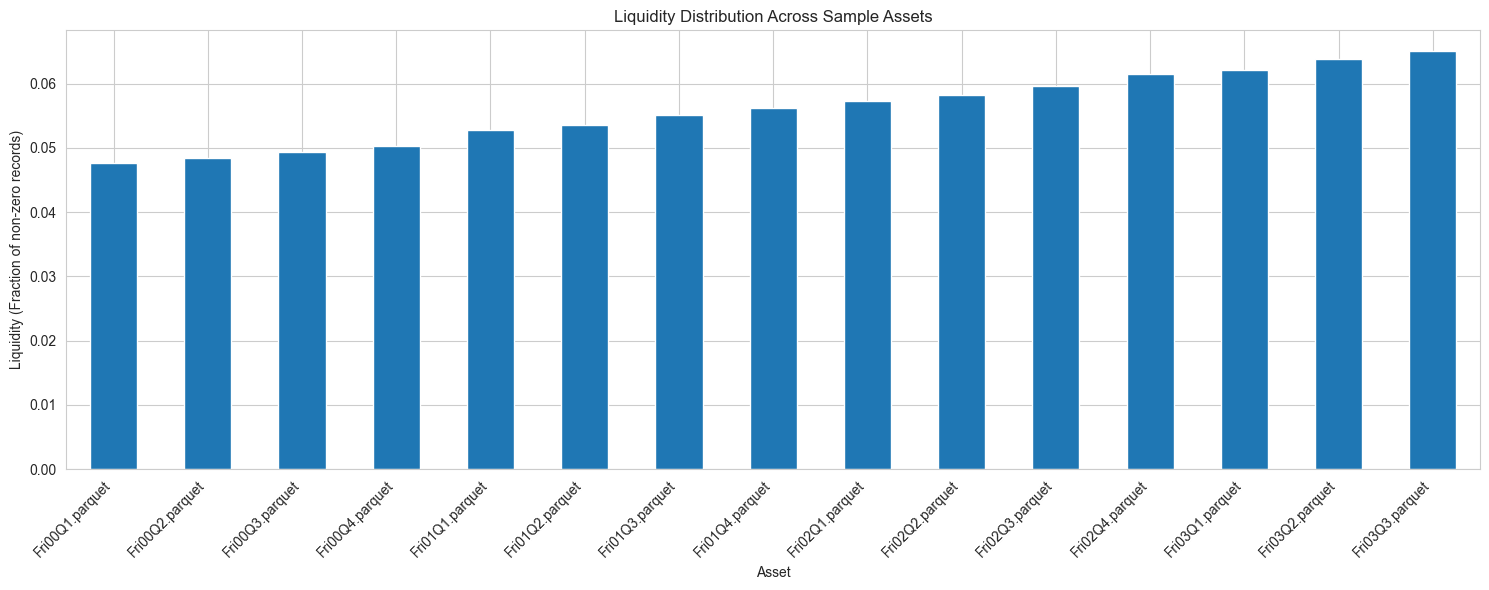

In [9]:
# --- This requires loading all data, which might be slow. ---
# --- For now, we'll calculate it on the samples we have loaded. ---

liquidity = {}
for name, df in dfs.items():
    # is_trading is 1 when any of the numeric cols are non-zero, which is a good proxy for volume > 0
    asset_liquidity = df['is_trading'].mean()
    liquidity[name] = asset_liquidity

liquidity_series = pd.Series(liquidity).sort_values()

print("Asset Liquidity (Fraction of time with active trading):")
display(liquidity_series)

# Plot the distribution of liquidity
plt.figure(figsize=(15, 6))
liquidity_series.plot(kind='bar')
plt.title('Liquidity Distribution Across Sample Assets')
plt.ylabel('Liquidity (Fraction of non-zero records)')
plt.xlabel('Asset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 1.5 Correlation Heatmaps

--- Within-Asset Correlation for Fri00Q1.parquet ---


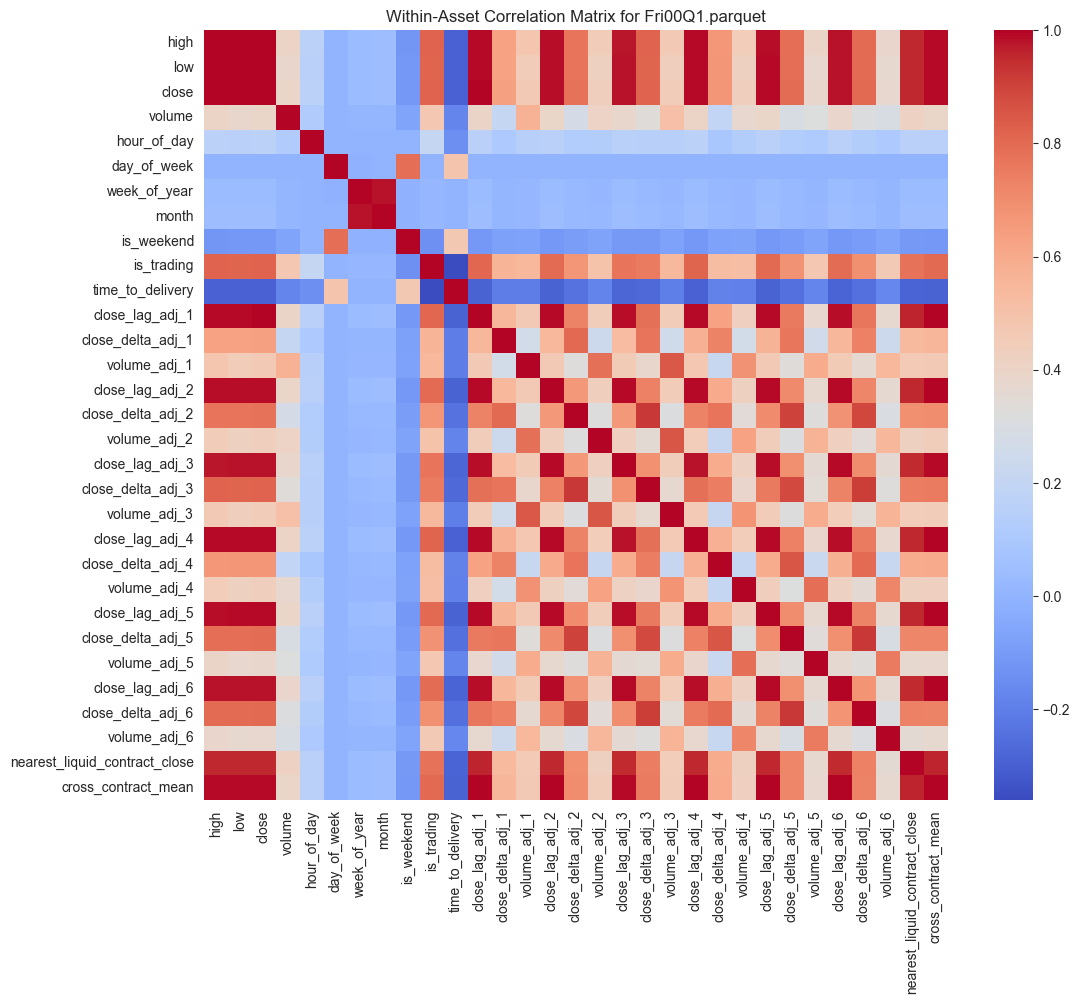

--- Cross-Asset Correlation for "close" price ---


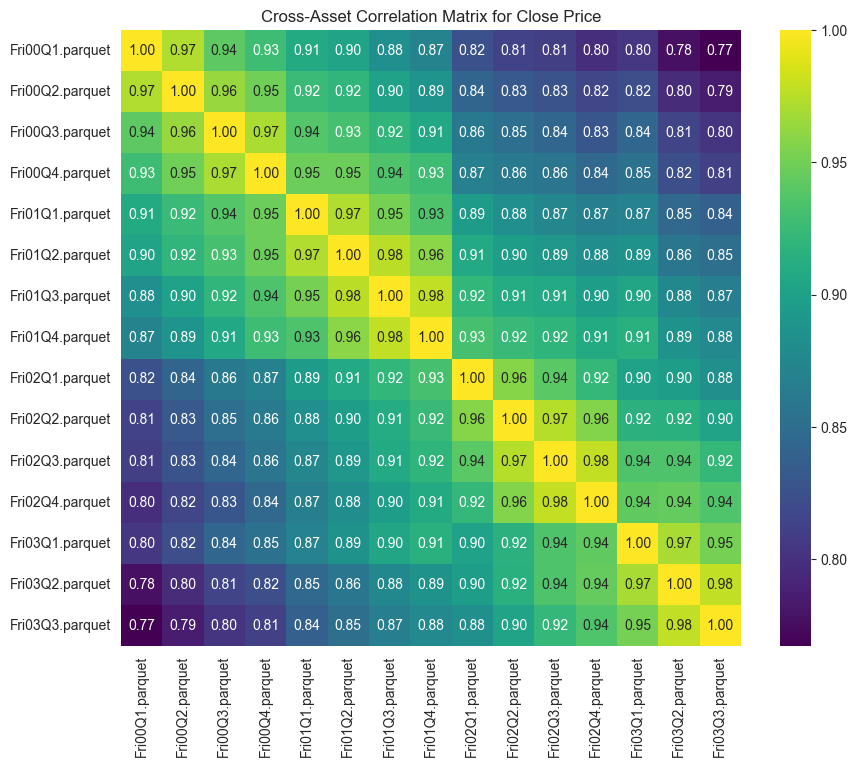

In [10]:
# 1. Within-asset correlation for the example asset
print(f"--- Within-Asset Correlation for {asset_example_name} ---")

# Select only numeric columns for correlation
numeric_cols = df_example.select_dtypes(include=np.number)
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title(f'Within-Asset Correlation Matrix for {asset_example_name}')
plt.show()


# 2. Cross-asset correlation for the 'close' price
print('--- Cross-Asset Correlation for "close" price ---')
# Create a dataframe with the 'close' price of all sample assets
close_prices = pd.DataFrame({name: df['close'] for name, df in dfs.items()})

cross_corr_matrix = close_prices.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(cross_corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Cross-Asset Correlation Matrix for Close Price')
plt.show()